# Modelo "Floresta Randômica"

Algorítmo Supervisionado destinado a tomada de decisões. Imagine que tenha vários amigos e faça uma mesma pegunta para cada um deles, o resultado será a resposta que tiver mais votos!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
%matplotlib inline

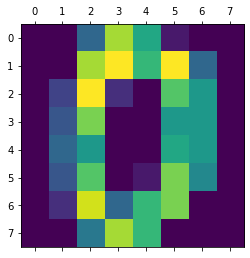

In [9]:
digits = load_digits()
plt.matshow(digits.images[0])
plt.show()

## Preparação dos Dados 

In [11]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
digits.target
df['valor'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,valor
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['valor'], axis='columns'), df['valor'], test_size = .2)
print(len(X_train), len(X_test))

1437 360


## Treino e Avaliação do Modelo 

In [20]:
clf = RandomForestClassifier(n_estimators=1200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1200)

In [21]:
clf.score(X_test, y_test)

0.9777777777777777

In [22]:
y_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 1  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  1  1  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  1  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  1  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  1  0  0  0 32]]


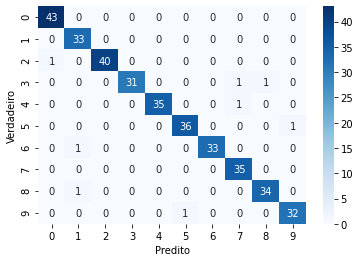

In [23]:
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()